## matplotlib

# matplotlib API : Artists

matplotlib Api hat drei Layer:

* matplotlib.backend_bases.FigureCanvas
* matplotlib.backend_bases.Renderer
* matplotlib.artist.Artist

es gibt zwei Typen von Artists:

 primitives (grafische Objekte)         | containers (wo diese hinkommen)         
---------------------|---------------------
 Line2D              |   Axis
 Rectangle           |   Axes
 Text                |   Figure
 AxesImage           |   
 ...                 |
Vorgehen zB:
* erzeuge figure-Instanz
* nutze diese um mehrere Axes und subplots zu erzeugen
* nutze dann die Axes helper methods (plot(), text(), hist(), imshow()..) um Daten zu nehmen und daraus primitive Artist instances (Line2D etc.) zu erzeugen

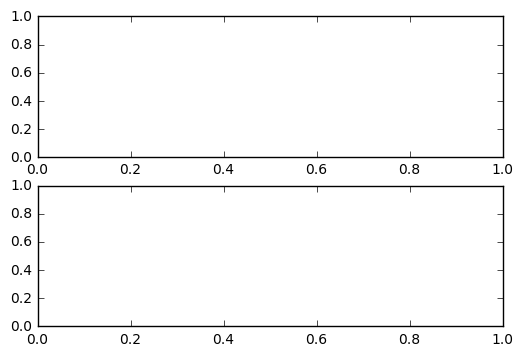

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2,1,1) # zwei Reihen, eine Spalte, linkester plot
ax1 = fig.add_subplot(2,1,2) # zwei Reihen, eine Spalte, rechter plot
plt.show()

Sublots ist ein Beispiel (subclass) von Axes. Wir koennen an beliebigen Stellen Axes hinzufuegen (mit relativen Koordinaten):

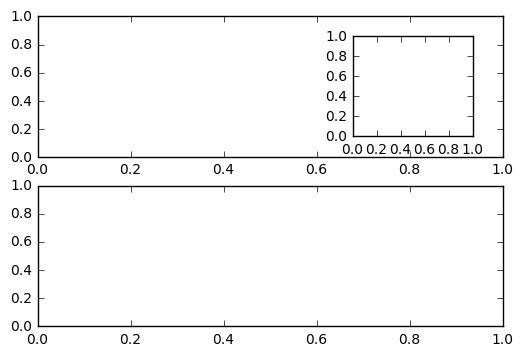

In [2]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1) # zwei Reihen, eine Spalte, linkester plot
ax1 = fig.add_subplot(2,1,2) # zwei Reihen, eine Spalte, rechter plot

ax2 = fig.add_axes([0.65, 0.6, 0.2, 0.25]) # [links, unten, breite, hoehe]
plt.show()

Bei Aufruf von ax.plot() wird eine Line2D Instanz erzeugt und diese wird zur Axes.lines Liste hinzugefuegt.


In [3]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(2,1,1) # zwei Reihen, eine Spalte, linkester plot
ax1 = fig.add_subplot(2,1,2) # zwei Reihen, eine Spalte, rechter plot
ax2 = fig.add_axes([0.65, 0.6, 0.2, 0.25]) # [links, unten, breite, hoehe]

N = 100

t = np.linspace(0.0, 1.0, N)
s = np.sin(2*np.pi*t)
c = np.cos(2*np.pi*t)

mat = c.reshape((N,1)).dot(s.reshape((1,N)))

line, = ax.plot(t, s, color='darkgreen', lw=2)

n, bins, patches = ax1.hist(np.random.randn(1000), 50,
    facecolor='yellow', edgecolor='yellow')

ax2.imshow(mat)

#plt.show()

Zeige, welche Lines es gibt und loesche welche:

In [4]:
print(ax.lines)
print(ax.lines[0])
print(line)
#del ax.lines[0]
#ax.lines.remove(line) 

Line2D(_line0)
Line2D(_line0)


Zum Konfigurieren und Dekorieren von Axes gibt es viele helper methods:

In [5]:
xtext = ax.set_xlabel('xdata') # uebergibt eine Textinstanz
ytext = ax.set_ylabel('ydata')


ax2.set_xlabel('time (s)')

#plt.show()

Jeder Artist hat die folgenden Eigenschaften:

Property |Description
------------|--------------
alpha 	|The transparency - a scalar from 0-1
animated 	|A boolean that is used to facilitate animated drawing
axes 	|The axes that the Artist lives in, possibly None
clip_box |	The bounding box that clips the Artist
clip_on 	|Whether clipping is enabled
clip_path| 	The path the artist is clipped to
contains |	A picking function to test whether the artist contains the pick point
figure |	The figure instance the artist lives in, possibly None
label 	|A text label (e.g., for auto-labeling)
picker |	A python object that controls object picking
transform 	|The transformation
visible |	A boolean whether the artist should be drawn
zorder |	A number which determines the drawing order
rasterized 	| Boolean; Turns vectors into rastergraphics: (for compression & eps transparency)

Diese werden noch oldschool nach dem setter - getter Prinzip gesetzt und abgefragt:

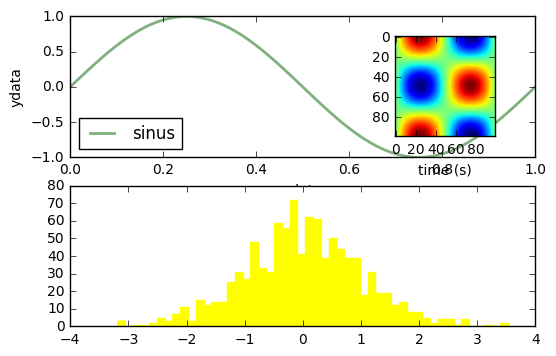

In [6]:
a = line.get_clip_box()
line.set_alpha(0.5)
# oder alles auf einmal setzen
line.set(alpha=0.5, zorder=2, label = "sinus")
ax.legend(loc = 'lower left')
plt.show()

In [7]:
# Eigenschaften des weissen Rechtecks fig
plt.getp(fig.patch)

    aa = False
    agg_filter = None
    alpha = None
    animated = False
    antialiased or aa = False
    axes = None
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], ...
    ec = (1, 1, 1, 0)
    edgecolor or ec = (1, 1, 1, 0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor or fc = (1, 1, 1, 0)
    fc = (1, 1, 1, 0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    ls = solid
    lw = 0.0
    patch_transform = CompositeGenericTransform(BboxTransformTo(Bbox([[0...
    path = Path(array([[ 0.,  0.],        [ 1.,  0.],        ...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = 

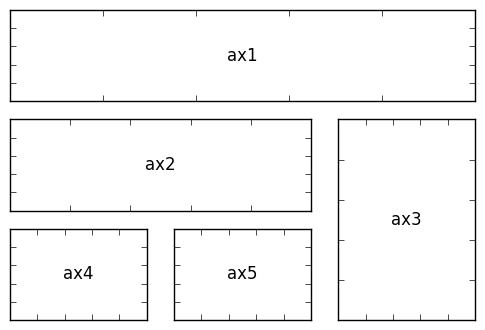

In [23]:
import numpy as np
from matplotlib import pyplot as plt

# Achsenkoordinaten
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height


fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

ax_list = fig.axes
i = 0
for ax in ax_list:
    i += 1
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.text(0.5*(left+right), 0.5*(bottom+top), 'ax'+str(i),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12, color='k',
        transform=ax.transAxes)
    
plt.show()